## Tugas Restorasi TF4012

Ronggur Mahendra Widya Putra

13519008

repository : https://github.com/ronggurmahendra/TF4012-Restorasi.git

In [92]:
#impoer library
import cv2 
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt,exp
import scipy.io
import h5py
from scipy.signal import fftconvolve
from scipy.signal import convolve
from scipy.signal import convolve2d as conv2
from skimage import color, data, restoration

In [93]:
def auto_canny(image, sigma=0.33):
    v = np.median(image)
    lower = int(max(0, (1.0 - sigma) * v))
    upper = int(min(255, (1.0 + sigma) * v))
    edged = cv2.Canny(image, lower, upper)
    return edged

In [94]:

def distance(point1,point2):
    return sqrt((point1[0]-point2[0])**2 + (point1[1]-point2[1])**2)
    
#https://gist.github.com/HiCraigChen/255cd53ca08b2b56a0fff60f4ce1da60
def idealFilterLP(D0,imgShape):
    base = np.zeros(imgShape[:2])
    rows, cols = imgShape[:2]
    center = (rows/2,cols/2)
    for x in range(cols):
        for y in range(rows):
            if distance((y,x),center) < D0:
                base[y,x] = 1
    return base

def idealFilterHP(D0,imgShape):
    base = np.ones(imgShape[:2])
    rows, cols = imgShape[:2]
    center = (rows/2,cols/2)
    for x in range(cols):
        for y in range(rows):
            if distance((y,x),center) < D0:
                base[y,x] = 0
    return base
# referensi https://gist.github.com/HiCraigChen/aea8765162db5c61da30df1f0d19d16a
def butterworthLP(D0,imgShape,n):
    base = np.zeros(imgShape[:2])
    rows, cols = imgShape[:2]
    center = (rows/2,cols/2)
    for x in range(cols):
        for y in range(rows):
            base[y,x] = 1/(1+(distance((y,x),center)/D0)**(2*n))
    return base

def butterworthHP(D0,imgShape,n):
    base = np.zeros(imgShape[:2])
    rows, cols = imgShape[:2]
    center = (rows/2,cols/2)
    for x in range(cols):
        for y in range(rows):
            base[y,x] = 1-1/(1+(distance((y,x),center)/D0)**(2*n))
    return base
# sumber https://gist.github.com/HiCraigChen/2ef0cbb005ddbb84a65a3ab25f46daab#file-gaussianfilter-py
def gaussianLP(D0,imgShape):
    base = np.zeros(imgShape[:2])
    rows, cols = imgShape[:2]
    center = (rows/2,cols/2)
    for x in range(cols):
        for y in range(rows):
            base[y,x] = exp(((-distance((y,x),center)**2)/(2*(D0**2))))
    return base

def gaussianHP(D0,imgShape):
    base = np.zeros(imgShape[:2])
    rows, cols = imgShape[:2]
    center = (rows/2,cols/2)
    for x in range(cols):
        for y in range(rows):
            base[y,x] = 1 - exp(((-distance((y,x),center)**2)/(2*(D0**2))))
    return base

In [95]:
#load PSF
mat = scipy.io.loadmat('PSF.mat')
psf = mat['PSF']

(<matplotlib.image.AxesImage at 0x25230f6c640>,
 Text(0.5, 1.0, 'Original Image'))

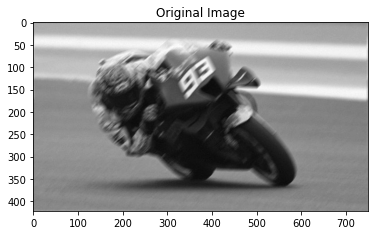

In [96]:
#load Image
img = cv2.imread("./motor_GP_gray.jpg",0)
# gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(img, cmap='gray', vmin=0, vmax=255), plt.title("Original Image")


In [97]:
#trying some preprossessing
blur = cv2.GaussianBlur(img,(5,5),0)

In [98]:
#lakukan deconvolusi menggunakan PSF yang diberikan
res = restoration.richardson_lucy(img, psf, num_iter=30,filter_epsilon = None,clip = 0)

(<matplotlib.image.AxesImage at 0x2523625b700>,
 Text(0.5, 1.0, 'Setelah deconvolusi'))

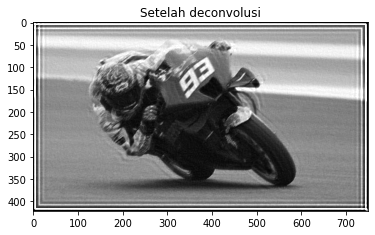

In [99]:
plt.imshow(res, cmap='gray', vmin=0, vmax=255), plt.title("Setelah deconvolusi")

Image yang didapatkan terdapat banyak noise

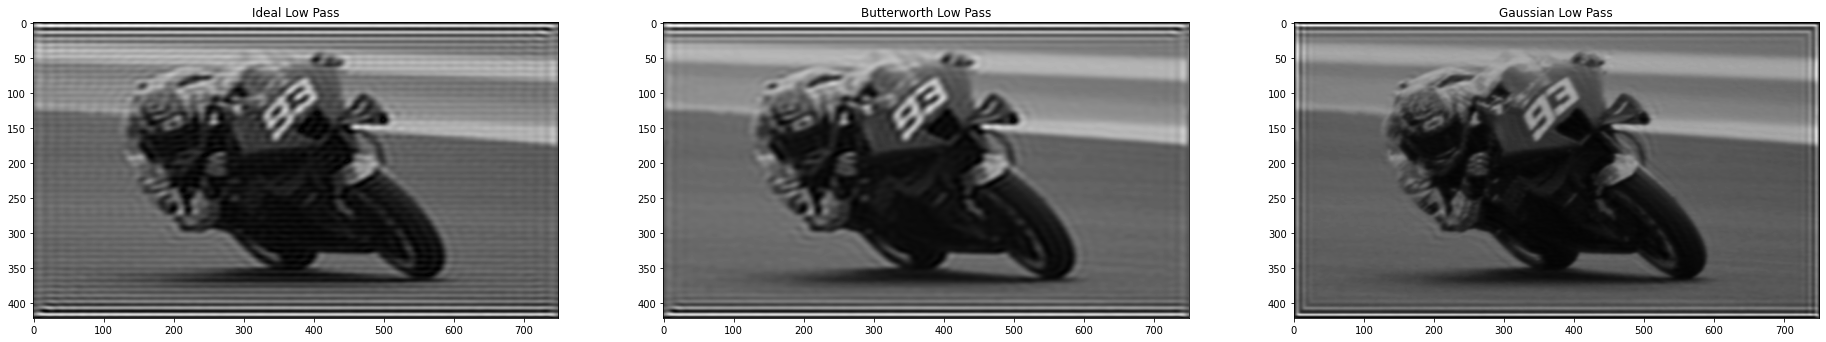

In [100]:
#mencoba berbagai macam jenis low pass filter
img = res.copy()

original = np.fft.fft2(img)
center = np.fft.fftshift(original)

plt.figure(figsize=(6.4*5, 4.8*5), constrained_layout=False)

#lowpassfilter ideal
LowPassCenter = center * idealFilterLP(50,img.shape)
LowPass = np.fft.ifftshift(LowPassCenter)
inverse_LowPass = np.fft.ifft2(LowPass)
img_idealFilterLP = np.abs(inverse_LowPass)
plt.subplot(131), plt.imshow(img_idealFilterLP, "gray"), plt.title("Ideal Low Pass")

#butterworth lowpassfilter
LowPassCenter = center * butterworthLP(50,img.shape,10)
LowPass = np.fft.ifftshift(LowPassCenter)
inverse_LowPass = np.fft.ifft2(LowPass)
img_butterworthLP = np.abs(inverse_LowPass)
plt.subplot(132), plt.imshow(img_butterworthLP, "gray"), plt.title("Butterworth Low Pass")

#gaussian lowpassfilter
LowPassCenter = center * gaussianLP(50,img.shape)
LowPass = np.fft.ifftshift(LowPassCenter)
inverse_LowPass = np.fft.ifft2(LowPass)
img_gaussianLP = np.abs(inverse_LowPass)
plt.subplot(133), plt.imshow(img_gaussianLP, "gray"), plt.title("Gaussian Low Pass")

plt.show()

di dapatkan bahwa gaussianLP didapatkan hasil terbaik

(<matplotlib.image.AxesImage at 0x2523628bbe0>,
 Text(0.5, 1.0, 'Hasil setelah lowpasfilter'))

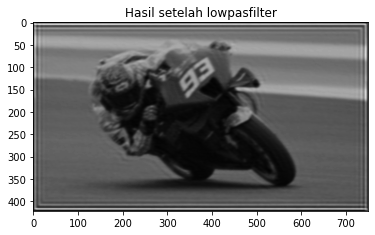

In [101]:
plt.imshow(img_gaussianLP, "gray"), plt.title("Hasil setelah lowpasfilter")

IMage final

(<matplotlib.image.AxesImage at 0x25231de68e0>,
 Text(0.5, 1.0, 'IMage setelah di restorasi'))

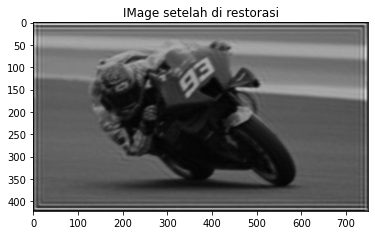

In [110]:
plt.imshow(img_gaussianLP, "gray"), plt.title("IMage setelah di restorasi")